# Lendo dados de um arquivo csv

Você pode ler dados de um arquivo CSV usando a função ```read_csv```. Por padrão, ela pressupõe que os campos são separados por vírgulas.

Vamos procurar alguns dados de ciclistas de Montreal. Estamos usando os dados de 2012.

Este conjunto de dados é uma lista de quantas pessoas estavam em sete ciclovias diferentes em Montreal, todos os dias.

(primeiro pegar o arquivo)

In [5]:
!wget https://raw.githubusercontent.com/jvns/pandas-cookbook/master/data/bikes.csv

--2018-06-13 12:40:21--  https://raw.githubusercontent.com/jvns/pandas-cookbook/master/data/bikes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13807 (13K) [text/plain]
Saving to: ‘bikes.csv.1’

bikes.csv.1         100%[===================>]  13.48K  --.-KB/s    in 0.006s  

2018-06-13 12:40:21 (2.08 MB/s) - ‘bikes.csv.1’ saved [13807/13807]



In [6]:
!ls

bikes.csv  bikes.csv.1	datalab


In [0]:
import pandas as pd

In [0]:
broken_df = pd.read_csv('https://raw.githubusercontent.com/jvns/pandas-cookbook/master/data/bikes.csv',
                        encoding='latin1')

In [9]:
# Vamos olhar as 3 primeiras linhas
broken_df[:3]

,Date;Berri 1;Brébeuf (données non disponibles);Côte-Sainte-Catherine;Maisonneuve 1;Maisonneuve 2;du Parc;Pierre-Dupuy;Rachel1;St-Urbain (données non disponibles)
0,01/01/2012;35;;0;38;51;26;10;16;
1,02/01/2012;83;;1;68;153;53;6;43;
2,03/01/2012;135;;2;104;248;89;3;58;


Você notará que isto está totalmente quebrado! O ```read_csv``` tem várias opções que nos permitirão corrigir isso. Aqui nós vamos:

 * altere o separador da coluna para ';'
 * Definir a codificação para 'latin1' (o padrão é 'utf8')
 * Faça o *parsing* das datas na coluna 'Date'
 * Diga que nossas datas têm o primeiro dia em vez do primeiro mês
 * Definir o índice da tabela para ser a coluna "Date"

In [10]:
fixed_df = pd.read_csv('bikes.csv',
                       sep=';',
                       encoding='latin1',
                       parse_dates=['Date'],
                       dayfirst=True,
                       index_col='Date')
fixed_df[:3]

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN


# Selecionando uma coluna

Quando você lê um CSV, você obtém um tipo de objeto chamado ```DataFrame```, que é composto de linhas e colunas. Você obtém colunas de um ```DataFrame``` da mesma maneira que obtém elementos de um dicionário.

Aqui está um exemplo:

In [11]:
fixed_df['Berri 1']

Date
2012-01-01      35
2012-01-02      83
2012-01-03     135
2012-01-04     144
2012-01-05     197
2012-01-06     146
2012-01-07      98
2012-01-08      95
2012-01-09     244
2012-01-10     397
2012-01-11     273
2012-01-12     157
2012-01-13      75
2012-01-14      32
2012-01-15      54
2012-01-16     168
2012-01-17     155
2012-01-18     139
2012-01-19     191
2012-01-20     161
2012-01-21      53
2012-01-22      71
2012-01-23     210
2012-01-24     299
2012-01-25     334
2012-01-26     306
2012-01-27      91
2012-01-28      80
2012-01-29      87
2012-01-30     219
              ... 
2012-10-07    1580
2012-10-08    1854
2012-10-09    4787
2012-10-10    3115
2012-10-11    3746
2012-10-12    3169
2012-10-13    1783
2012-10-14     587
2012-10-15    3292
2012-10-16    3739
2012-10-17    4098
2012-10-18    4671
2012-10-19    1313
2012-10-20    2011
2012-10-21    1277
2012-10-22    3650
2012-10-23    4177
2012-10-24    3744
2012-10-25    3735
2012-10-26    4290
2012-10-27    1857
2012-10

# Plotando uma coluna

Basta adicionar ```.plot()``` ao final! Como isso poderia ser mais fácil? =)

Podemos ver que, sem surpresa, muitas pessoas não estão pedalando em janeiro, fevereiro e março.

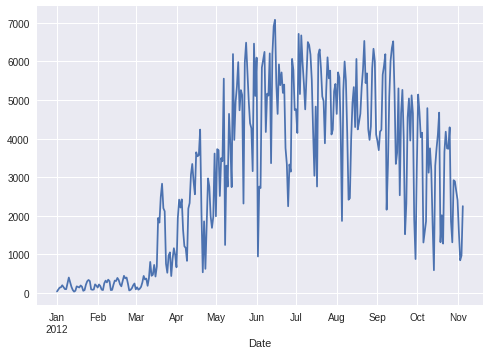

In [12]:
fixed_df['Berri 1'].plot()

Também podemos plotar todas as colunas com a mesma facilidade. Você pode ver que ele está mais apertado, mas todas as ciclovias se comportam basicamente da mesma forma - se é um dia ruim para os ciclistas, é um dia ruim em todos os lugares.

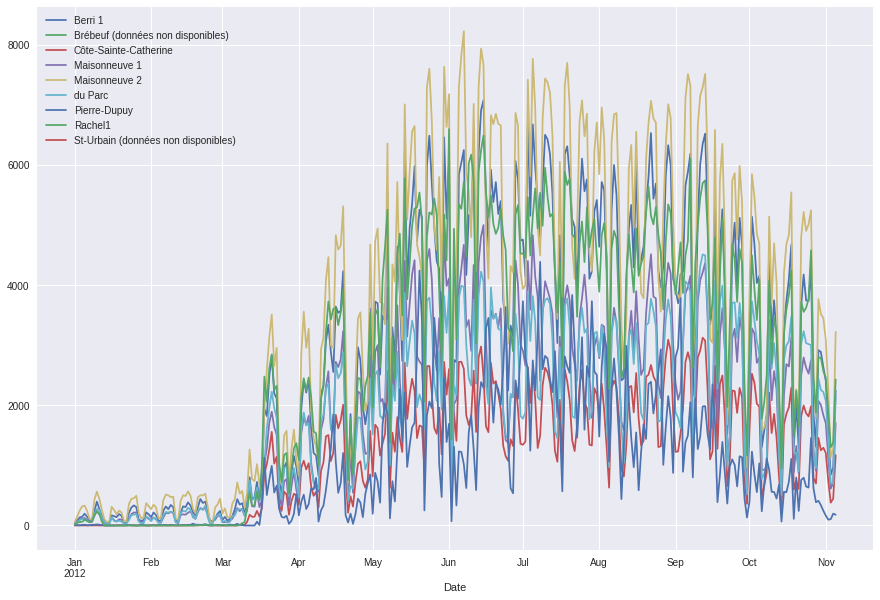

In [13]:
fixed_df.plot(figsize=(15, 10))